# NLP Application Assignment
## Gabriel Marcelino
## CST-435
**October 16, 2024**  



## Problem Statement
The objective of this project is to develop a machine learning model that can accurately predict the sentiment of text data. The model will classify text into two categories: Positive and Negative/Neutral. This sentiment analysis tool can be applied to various domains such as customer reviews, social media posts, and feedback forms to gain insights into public opinion and improve decision-making processes.

## 1. Import Requirements and load data


In [66]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


# Load the dataset
data = pd.read_csv('archive/train.csv', encoding='ISO-8859-1')

# Split data into training and testing sets (80% train, 20% test)
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# display 5 first rows data
print(test_set.head())

           textID                                               text  \
1588   a7f72a928a   WOOOOOOOOOO   are you coming to Nottingham at...   
23879  ef42dee96c                 resting had a whole day of walking   
6561   07d17131b1  was in Palawan a couple of days ago, i`ll try ...   
2602   2820205db5   I know! I`m so slow its horrible. DON`T TELL ...   
4003   7d3ce4363c  Glad I went out, glad I didn`t leave early, an...   

                                           selected_text sentiment  \
1588                                    t?  lovelovelove  positive   
23879                 resting had a whole day of walking   neutral   
6561   was in Palawan a couple of days ago, i`ll try ...   neutral   
2602                                           horrible.  negative   
4003                                                glad  positive   

      Time of Tweet Age of User       Country  Population -2020  \
1588           noon       60-70         Libya           6871292   
23879       

## 2. Preprocess and Visualize the Data:

Number of positie sentences 6877
Number of negative sentences 6219
Number of neutral sentences  8888


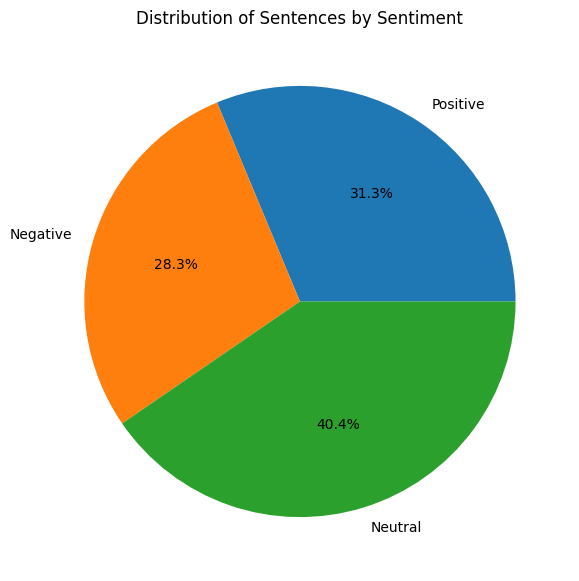

In [67]:
# count the number of positives, negatives and neutral
positives = train_set[train_set['sentiment'] == "positive"]
num_positives = positives.shape[0]
print(f"Number of positie sentences", num_positives)

negatives = train_set[train_set['sentiment'] == 'negative']
num_negatives = negatives.shape[0]
print(f"Number of negative sentences", num_negatives)

neutral = train_set[train_set['sentiment'] == 'neutral']
num_neutral = neutral.shape[0]
print(f"Number of neutral sentences ", num_neutral)
# plot data
sentiment_counts = {'Positive': num_positives, 'Negative': num_negatives, "Neutral": num_neutral}

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title('Distribution of Sentences by Sentiment')
plt.show()


## 3. Prepare data

In [68]:
# download stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert all values to strings
    text = text.astype(str)
    # Remove non-letters
    text = text.str.replace('[^\w\s]', '', regex=True)
    # Convert to lower case
    text = text.str.lower()
    # Remove stop words
    text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return text

# remove punctuation and stop words from data
train_set["cleaned_text"] = preprocess_text(train_set["text"])
test_set["cleaned_text"] = preprocess_text(test_set["text"])

# Show example
print(train_set["cleaned_text"].iloc[0])
print(test_set["cleaned_text"].iloc[0])

# convert sentiment into binary values (0 = negative/neutral, 1 = positive)
label_mapping = {'negative': 0, 'positive': 1, 'neutral': 0}
train_set['sentiment'] = train_set['sentiment'].map(label_mapping)
test_set['sentiment'] = test_set['sentiment'].map(label_mapping)


doctor finished
woooooooooo coming nottingham point lovelovelove3


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Train Model

In [69]:
# set the target and features
X_train = train_set['cleaned_text']
y_train = train_set['sentiment']
X_test = test_set['cleaned_text']
y_test = test_set['sentiment']

# assign each word in every text element a sentiment score using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=7000, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Use a binary classification algorithm (e.g., logistic regression), which you can import from sklearn.
model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the data set using the model.
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

## 5. Evaluate Model

Accuracy: 0.84
Confusion Matrix:
[[3290  502]
 [ 387 1318]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3792
           1       0.72      0.77      0.75      1705

    accuracy                           0.84      5497
   macro avg       0.81      0.82      0.81      5497
weighted avg       0.84      0.84      0.84      5497



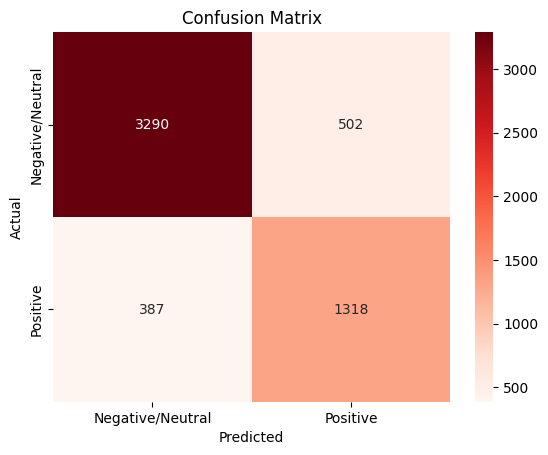

In [70]:
y_pred = model.predict(X_test)

# evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# generate a confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# visualize the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds",xticklabels=['Negative/Neutral', 'Positive'], yticklabels=['Negative/Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7. Predict Sentiment of Sample Sentences

In [72]:
def predict_sentiment(sentences):
    # Preprocess the input sentences
    cleaned_sentences = preprocess_text(pd.Series(sentences))
    # Convert the sentences to vectors
    sentence_vectors = vectorizer.transform(cleaned_sentences)
    # Predict the sentiment of the input sentences
    predictions = model.predict(sentence_vectors)
    # Display the predicted sentiment for each sentence
    for sentence, sentiment in zip(sentences, predictions):
        print(f'Sentence: {sentence}')
        print(f'Predicted Sentiment: {"Positive" if sentiment == 1 else "Negative/Neutral"}')
        print()


sample_sentences = [
    "I love this product! It works perfectly and exceeds my expectations.",
    "This is the worst service I have ever experienced. Completely unacceptable.",
    "The movie was good, but it could have been better.",
    "I'm so happy with my purchase. Highly recommend it to everyone!",
    "The food was mediocre and the service was slow. Not impressed."
]

predict_sentiment(sample_sentences)


Sentence: I love this product! It works perfectly and exceeds my expectations.
Predicted Sentiment: Positive

Sentence: This is the worst service I have ever experienced. Completely unacceptable.
Predicted Sentiment: Negative/Neutral

Sentence: The movie was good, but it could have been better.
Predicted Sentiment: Positive

Sentence: I'm so happy with my purchase. Highly recommend it to everyone!
Predicted Sentiment: Positive

Sentence: The food was mediocre and the service was slow. Not impressed.
Predicted Sentiment: Negative/Neutral



## 8. Final Considerations

**Algorithm of the Solution:**
1. **Data Collection:** Gather text data from dataset available on Kaggle: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset?resource=download.
2. **Data Preprocessing:** Clean the data by converting it to lowercase, eliminating stop words, and punctuation.
3. **Feature Extraction:** Apply TF-IDF (Term Frequency-Inverse Document Frequency) to transform the cleaned text into numerical features.
4. **Model Training:** Train a logistic regression model on the processed data to classify sentiment.
5. **Model Evaluation:** Assess model performance using a confusion matrix and other relevant metrics.
6. **Prediction:** Use the trained model to predict the sentiment of new text data.

**Analysis of the Findings**
The logistic regression model achieved an accuracy of 0.84, indicating it can correctly classify sentiment in 84% of the cases. The confusion matrix shows that the model correctly classified 3290 negative (class 0) and 1318 positive (class 1) sentiments, with 502 and 387 misclassifications, respectively. 

The classification report highlights strong performance for class 0 (negative sentiment) with high precision (0.89) and recall (0.87), while class 1 (positive sentiment) has lower precision (0.72) and recall (0.77), suggesting room for improvement in detecting positive sentiments. The weighted average f1-score of 0.84 reflects balanced overall performance across both classes.

The example predictions demonstrate the model's ability to distinguish between positive, neutral, and negative sentiments, although some sentences with mixed sentiment were classified as "Negative/Neutral." This points to a potential challenge in handling more nuanced or mixed expressions, which could be addressed by further tuning or adding more sophisticated natural language processing techniques.

**Summarize the project, explaining to what extent it is suitable to perform sentiment analysis**
This sentiment analysis project focuses on classifying text data as positive or negative using a logistic regression model. The project uses a dataset from Kaggle, which includes various customer reviews and social media posts. After collecting and preprocessing the data (like cleaning and normalizing the text), we apply TF-IDF to convert the text into numerical features suitable for machine learning. 
The model is trained and evaluated using metrics like accuracy and confusion matrix, achieving a commendable accuracy of 84%. This demonstrates that the model can effectively understand and classify sentiment in straightforward text, making it suitable for applications like product reviews, social media monitoring, and customer feedback analysis. However, there is still room for improvement since the model may struggle with mixed sentiments or complex phrases.

**References**
- https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
- https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
